In [1]:
import os
from os.path import join
from glob import glob
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

In [17]:
dir_work = join('/mnt/f/spss')
fname = join(dir_work,'KCYPS2018e4Yw5.sav')

In [18]:
df, meta = pyreadstat.read_sav(fname, encoding='cp949')

---

In [19]:
columns = np.array(df.columns)

In [20]:
tmp = meta.column_labels
indices = [i for i, val in enumerate(tmp) if '[자아존중감]' in val]
np.array(tmp)[indices]

array(['[자아존중감]-나는 나에게 만족한다', '[자아존중감]-때때로 나는 내가 어디에도 소용없는 사람이라고 생각한다',
       '[자아존중감]-나는 내가 장점이 많다고 느낀다',
       '[자아존중감]-나는 내가 적어도 다른 사람만큼 가치 있는 사람이라고 느낀다',
       '[자아존중감]-나는 내가 자랑스러워할 만한 것이 별로 없다고 느낀다',
       '[자아존중감]-때때로 나는 내가 쓸모없는 존재로 느껴진다', '[자아존중감]-나는 남들만큼의 일은 할 수 있다',
       '[자아존중감]-나는 나를 좀 더 존중할 수 있었으면 좋겠다',
       '[자아존중감]-나는 내가 실패자라고 느끼는 경향이 있다',
       '[자아존중감]-나는 나에 대해 긍정적인 태도를 지니고 있다'], dtype='<U74')

In [21]:
columns = columns[indices]
columns

array(['YPSY3A01w5', 'YPSY3A02w5', 'YPSY3A03w5', 'YPSY3A04w5',
       'YPSY3A05w5', 'YPSY3A06w5', 'YPSY3A07w5', 'YPSY3A08w5',
       'YPSY3A09w5', 'YPSY3A10w5'], dtype=object)

In [22]:
dg = df[columns].dropna()
dg

,YPSY3A01w5,YPSY3A02w5,YPSY3A03w5,YPSY3A04w5,YPSY3A05w5,YPSY3A06w5,YPSY3A07w5,YPSY3A08w5,YPSY3A09w5,YPSY3A10w5
0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0
1,3.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0
2,2.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0,2.0,2.0
3,3.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0
4,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2599,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2601,3.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0
2603,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
2604,4.0,1.0,4.0,4.0,1.0,1.0,4.0,3.0,2.0,3.0


In [25]:
## 2,5,6,8,9 열은 5-val로 치환
tmp = np.array([2, 5, 6, 8, 9])-1
col = columns[tmp]
dg[col] = 5 - dg[col]
dg

,YPSY3A01w5,YPSY3A02w5,YPSY3A03w5,YPSY3A04w5,YPSY3A05w5,YPSY3A06w5,YPSY3A07w5,YPSY3A08w5,YPSY3A09w5,YPSY3A10w5
0,3.0,2.0,1.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0
1,3.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,2.0,3.0
2,2.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0
3,3.0,3.0,4.0,4.0,1.0,1.0,3.0,3.0,2.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2599,4.0,3.0,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0
2601,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0
2603,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0
2604,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0


In [26]:
tmp = dg.loc[:,columns].sum(axis=1).values
tmp

array([31., 31., 25., ..., 26., 36., 27.])

<Axes: ylabel='Count'>

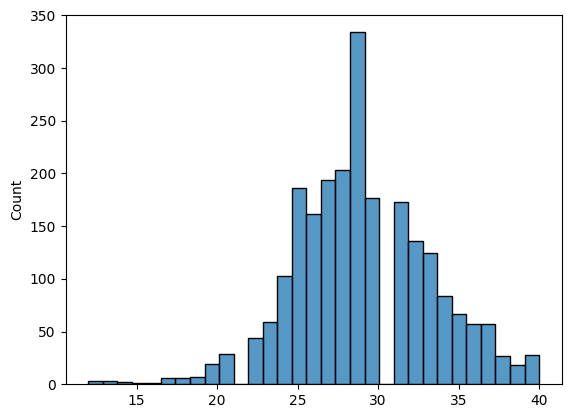

In [27]:
sns.histplot(tmp)

In [28]:
## 평균
mean_val = np.mean(tmp)

## 표준편차
std_val = np.std(tmp, ddof=1)   # 표본 표준편차 (ddof=1), 모표준편차는 ddof=0

## 왜도 (skewness)
skew_val = skew(tmp)

## 첨도 (kurtosis)
kurt_val = kurtosis(tmp)  # 기본적으로 Fisher 정의 (정규분포=0)

In [29]:
print("평균:", mean_val)
print("표준편차:", std_val)
print("왜도:", skew_val)
print("첨도:", kurt_val)

평균: 29.032020770229337
표준편차: 4.305519987752509
왜도: 0.03397383287444565
첨도: 0.49516474378291075


---

---